<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/3.2_clustering_dimension-reduction/stats_clusterdimred_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Clustering and dimension-reduction
# K-means clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

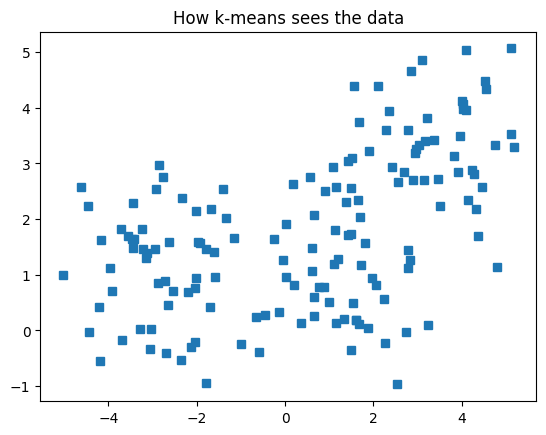

In [ ]:
## Create data

nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# show the data
plt.plot(data[:,0],data[:,1],'s')
plt.title('How k-means sees the data')
plt.show()

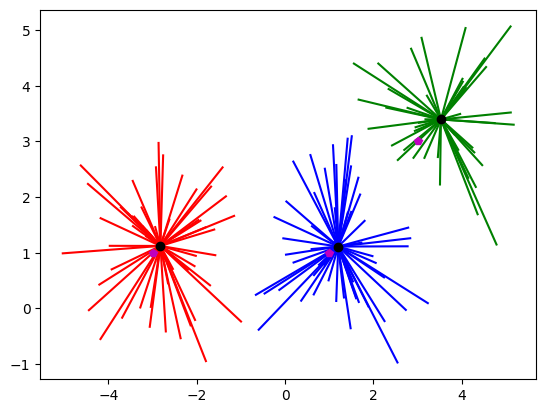

In [ ]:
## k-means clustering

k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
for i in range(0,len(data)):
    plt.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko')

# finally, the "ground-truth" centers
plt.plot(A[0],A[1],'mp')
plt.plot(B[0],B[1],'mp')
plt.plot(C[0],C[1],'mp')

plt.show()

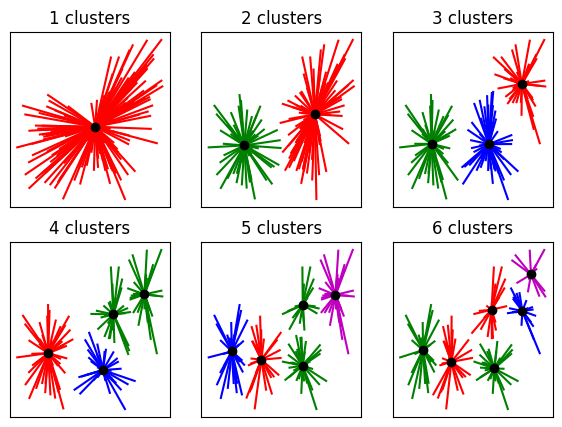

In [ ]:
## determining the appropriate number of clusters (qualitative)

fig,ax = plt.subplots(2,3,figsize=(7,5))
ax = ax.flatten()

for k in range(6):

    kmeans = KMeans(n_clusters=k+1).fit(data)
    groupidx = kmeans.predict(data)
    cents = kmeans.cluster_centers_

    # draw lines from each data point to the centroids of each cluster
    for i in range(0,len(data)):
        ax[k].plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],lineColors[groupidx[i]])

    # and now plot the centroid locations
    ax[k].plot(cents[:,0],cents[:,1],'ko')
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    ax[k].set_title('%g clusters'%(k+1))

/tmp/ipykernel_11854/4079972229.py:6: RuntimeWarning: invalid value encountered in divide
  sils = np.zeros(7)/0


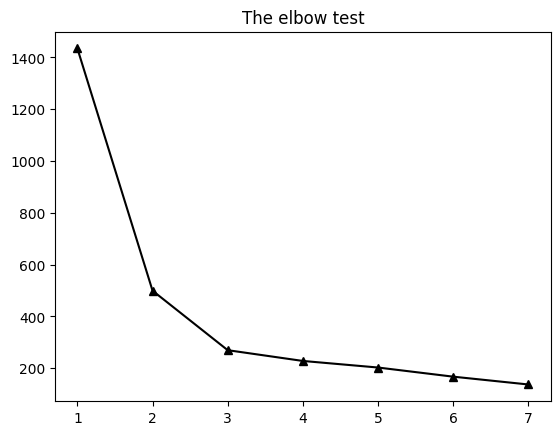

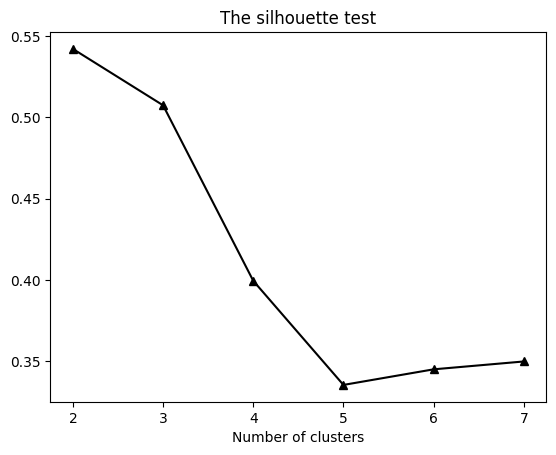

In [ ]:
## number of clusters (quantative)

from sklearn.metrics import silhouette_samples, silhouette_score

ssds = np.zeros(7)
sils = np.zeros(7)/0

for k in range(7):
    kmeans = KMeans(n_clusters=k+1).fit(data)
    ssds[k] = np.mean(kmeans.inertia_)

    if k>0:
        s = silhouette_samples(data,kmeans.predict(data))
        sils[k] = np.mean( s )

plt.plot(np.arange(1,8),ssds,'k^-',markerfacecolor='k')
plt.title('The elbow test')
plt.show()

plt.plot(np.arange(1,8),sils,'k^-',markerfacecolor='k')
plt.title('The silhouette test')
plt.xlabel('Number of clusters')
plt.show()

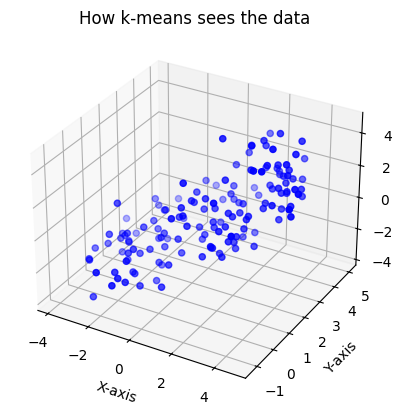

In [ ]:
# Parameters
nPerClust = 50  # Points per cluster
n = 1           # Standard deviation for cluster spread

# Centroids
A = [1, 2, 0]
B = [-2, 1, -2]
C = [3, 3, 2]

# Generate data for each cluster
a = np.array([A[0] + np.random.randn(nPerClust) * n,
              A[1] + np.random.randn(nPerClust) * n,
              A[2] + np.random.randn(nPerClust) * n]).T

b = np.array([B[0] + np.random.randn(nPerClust) * n,
              B[1] + np.random.randn(nPerClust) * n,
              B[2] + np.random.randn(nPerClust) * n]).T

c = np.array([C[0] + np.random.randn(nPerClust) * n,
              C[1] + np.random.randn(nPerClust) * n,
              C[2] + np.random.randn(nPerClust) * n]).T

# Concatenate data into a single array
data = np.vstack((a, b, c))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o')

# Add title and labels
ax.set_title('How k-means sees the data')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()


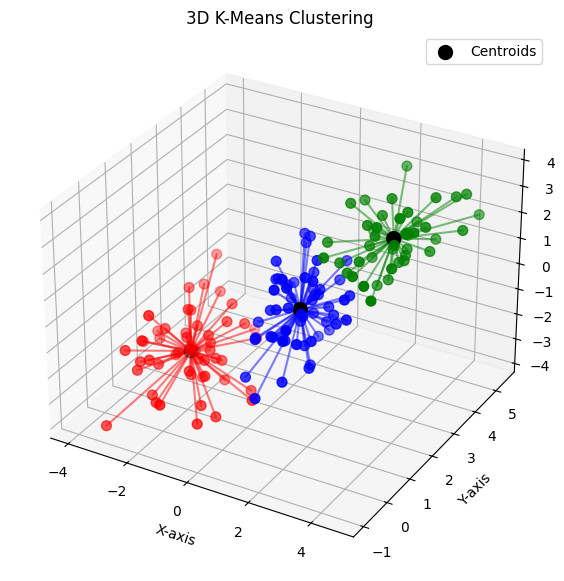

In [ ]:
# Generate example data (replace with your data if needed)
nPerClust = 50
n = 1
A = [1, 2, 0]
B = [-2, 1, -2]
C = [3, 3, 2]

a = np.array([A[0] + np.random.randn(nPerClust) * n,
              A[1] + np.random.randn(nPerClust) * n,
              A[2] + np.random.randn(nPerClust) * n]).T
b = np.array([B[0] + np.random.randn(nPerClust) * n,
              B[1] + np.random.randn(nPerClust) * n,
              B[2] + np.random.randn(nPerClust) * n]).T
c = np.array([C[0] + np.random.randn(nPerClust) * n,
              C[1] + np.random.randn(nPerClust) * n,
              C[2] + np.random.randn(nPerClust) * n]).T

data = np.vstack((a, b, c))

# Apply KMeans clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)
groupidx = kmeans.predict(data)
cents = kmeans.cluster_centers_

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = ['r', 'g', 'b']

# Plot lines from points to their centroids
for i in range(len(data)):
    ax.plot(
        [data[i, 0], cents[groupidx[i], 0]],
        [data[i, 1], cents[groupidx[i], 1]],
        [data[i, 2], cents[groupidx[i], 2]],
        color=colors[groupidx[i]],
        alpha=0.5
    )

# Plot data points
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=[colors[idx] for idx in groupidx], s=50)

# Plot centroids
ax.scatter(cents[:, 0], cents[:, 1], cents[:, 2], c='k', s=100, marker='o', label='Centroids')

# Add labels and legend
ax.set_title('3D K-Means Clustering')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

plt.show()